Sofia Di Capua, NIU: 1603685

Marc Bosom, NIU:1606776

# Imports importants

In [205]:
from matplotlib import pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import math
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy.stats

# Comanda per ignorar els warnings
np.warnings.filterwarnings('ignore')

# Descàrrega del DATASET

In [206]:
train = 'train.csv'

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset_train = load_dataset(train)
data_train = dataset_train.values

dimensio_x = data_train[:, :11]
dimensio_y = data_train[:, 11]

print("Dimensionalitat de la BBDD:", dataset_train.shape)
print("Dimensionalitat de les entrades X", dimensio_x.shape)
print("Dimensionalitat de l'atribut Y", dimensio_y.shape)

Dimensionalitat de la BBDD: (891, 12)
Dimensionalitat de les entrades X (891, 11)
Dimensionalitat de l'atribut Y (891,)


# Preparació del dataset

Qualsevol canvi que es fa en el train s'ha de fer en el test !

In [207]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Primer mirem que no hi hagi valors nuls en el nostre dataset

In [208]:
print(dataset_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Podem veure que de 891 files que té el nostre dataset, en la columna corresponent a *Age* hi ha 177 valors NaN, en *Cabin* hi ha 687 i en *Embarked* 2. 

Per tractar aquestes dades eliminarem les dues primeres i, en *Cabin* posarem en aquella fila el valor mitjà de la resta de valors omplerts.

### Define a function to impute (fill-up missing values) age feature

In [209]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return a[0]

        elif Pclass == 2:
            return a[1]

        else:
            return a[2]

    else:
        return Age

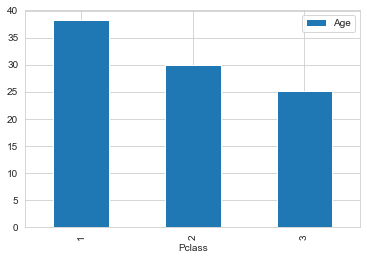

In [210]:
f_class_Age=dataset_train.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='Age')
a=list(f_class_Age['Age'])

**Apply the above-defined function and plot the count of numeric features**

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

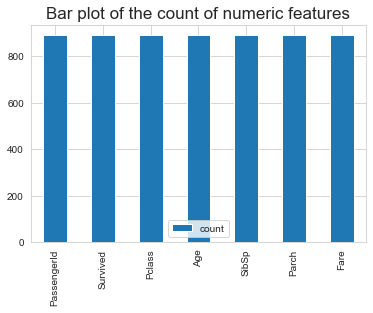

In [211]:
dataset_train['Age'] = dataset_train[['Age','Pclass']].apply(impute_age,axis=1)
d=dataset_train.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

In [212]:
dataset_train['Age']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

In [213]:
for i in range(len(dataset_train['Age'])):
    dataset_train['Age'][i] = int(dataset_train['Age'][i])

In [214]:
dataset_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Drop the 'Cabin' feature and any other null value

In [8]:
dataset_train.drop('Cabin',axis=1,inplace=True)
dataset_train.dropna(inplace=True)
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Variable parch sembla que té masses 0, n'hem a comprovar-ho

In [9]:
ratio_parch_train = dataset_train['Parch'].sum() / 891
print("Ratio de la variable Parch en el train", ratio_parch_train)

Ratio de la variable Parch en el train 0.38159371492704824


El ratio en el dataset train sembla massa gran com per poder treure-la així que continuem amb la variable Parch

### Drop other unnecessary features like 'PassengerId', 'Name', 'Ticket'

In [10]:
dataset_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
dataset_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Convert categorial feature like 'Sex' and 'Embarked' to dummy variables
**Use pandas 'get_dummies()' function**

In [11]:
transformer=make_column_transformer((OneHotEncoder(),['Embarked','Sex']),remainder='passthrough')

transformed=transformer.fit_transform(dataset_train)
dataset_train=pd.DataFrame(transformed, columns=transformer.get_feature_names())

In [12]:
dataset_train.head()

,onehotencoder__x0_C,onehotencoder__x0_Q,onehotencoder__x0_S,onehotencoder__x1_female,onehotencoder__x1_male,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,1.0,1.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,1.0,1.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,1.0,0.0,3.0,35.0,0.0,0.0,8.0500


In [13]:
dataset_train.rename(columns = {'onehotencoder__x0_C':'C',
                              'onehotencoder__x0_Q':'Q',
                              'onehotencoder__x0_S':'S',
                              'onehotencoder__x1_female': 'Is_female'}, inplace=True)

dataset_train.drop(['onehotencoder__x1_male'],axis=1,inplace=True)

In [14]:
dataset_train.head()

,C,Q,S,Is_female,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,1.0,1.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,1.0,1.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,0.0,3.0,35.0,0.0,0.0,8.0500


Última proba de que no hi ha cap altre NaN.

In [15]:
print(dataset_train.isnull().sum())

C            0
Q            0
S            0
Is_female    0
Survived     0
Pclass       0
Age          0
SibSp        0
Parch        0
Fare         0
dtype: int64


This data set is now ready for whatever analysis! But we must first reorder it so the column "Survived" is on the first position. This will make us easier the acces to it.

In [16]:
columns = dataset_train.columns.tolist()
columns_aux = []

columns_aux.append(columns[4])
columns_aux = columns_aux + columns[0:4]

columns = columns_aux + columns[5:]

In [17]:
dataset_train = dataset_train[columns]; dataset_train.head()

,Survived,C,Q,S,Is_female,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,0.0,0.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,0.0,0.0,1.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,0.0,1.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,0.0,1.0,0.0,3.0,35.0,0.0,0.0,8.0500


# Apartat (B): Classificació Numèrica (6pts)

## 1. EDA (exploratory data analysis)

Tal com vam fer a la primera pràctica, en aquest apartat el nostre objectiu serà explorar i visualitzar la base de dades del Titanic. Com que ja tenim el dataset amb les variables que ens interessen i, a més, tractades, ens centrarem a definir el target (variable objectiu), observar les distribucions i correlacions de les nostres variables i analitzar com aquesta última pot afectar a la classificació.

**Preguntes:**
* Quants atributs té la vostra base de dades?
* Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)
* Com es el target, quantes categories diferents existeixen?
* Podeu veure alguna correlació entre X i y?
* Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució?


In [18]:
dataset_train.head()

,Survived,C,Q,S,Is_female,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,0.0,0.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,0.0,0.0,1.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,0.0,1.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,0.0,1.0,0.0,3.0,35.0,0.0,0.0,8.0500


Vam posar la variable Survived a la primera columna per tenir un millor accés a ella, perquè ja volíem que fos la nostra variable objectiu. En aquesta pràctica volem predir si sobreviurà o no un passatger en funció del seu sexe, edat, classe en la qual viatjava, etc.

### Exploratory analysis and plots
Observem la quantitat de passatgers que van sobrebiure i dels que no.

<AxesSubplot:xlabel='Survived', ylabel='count'>

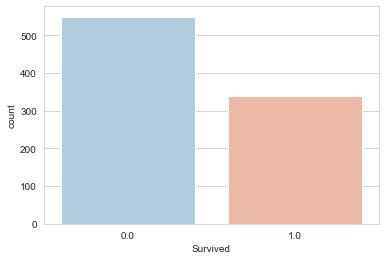

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=dataset_train,palette='RdBu_r')

L'enfonsament del Titanic va succeir el 1912, una època en la que el feminisme no estava tan desenvolupat com avui dia. Per aquesta raó ens preguntem:

**Pot haver un patró de supervivència basat en el sexe?**

<AxesSubplot:xlabel='Survived', ylabel='count'>

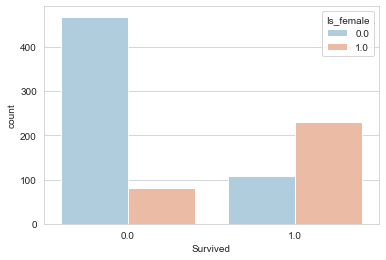

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Is_female',data=dataset_train,palette='RdBu_r')

Sorprenentment van sobreviure més dones que homes! En aquest cas podem afirmar que la frase "Primer les dones i els nens" es va complir a malgrat el pànic col·lectiu.

També en aquella època la gent era molt classista (ho podem afirmar per la pel·lícula Titanic). Així doncs:

**Hi haurà algun patró relacionat amb la classe amb què es viatjava?**

<AxesSubplot:xlabel='Survived', ylabel='count'>

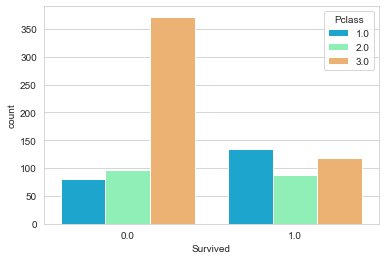

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=dataset_train,palette='rainbow')

Sembla que els de primera i segona classe van sobreviure molt més que els de tercera classe. Però, com és usual, hi ha més passatgers de tercera classe que de primera i segona. Per poder afirmar de quina classe van morir més passatgers cal fer un plot de la fracció de passatgers que van sobreviure per classe.

Text(0.5, 1.0, 'Fraction of passengers survived by class')

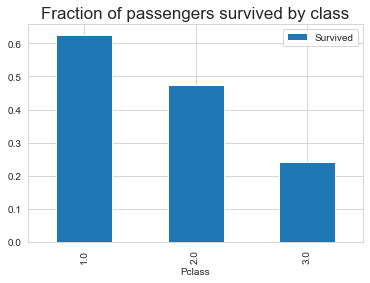

In [22]:
f_class_survived=dataset_train.groupby('Pclass')['Survived'].mean()
f_class_survived = pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='Survived')
plt.title("Fraction of passengers survived by class",fontsize=17)

Ara sí que podem afirmar que els de tercera classe van morir la majoria i que molts de primera classe van sobreviure.

**I algun patró relacionat amb tenir germans o cònjuges?**

<AxesSubplot:xlabel='Survived', ylabel='count'>

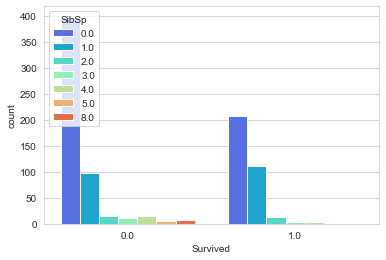

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=dataset_train,palette='rainbow')

Sembla que hi ha una tendència feble que augmenta la probabilitat de supervivència si hi ha més nombre de germans o cònjuges.

Amb tots aquests plots podem afirmar que per predir si un passatger sobreviura o no, cal que ens fixem majoritàriament en el sexe i la classe.

Ara n'hem a veure les distribucions de les variables que considerem interessants a estudiar per predir Survived. Fare, Embarked (C, Q, S) i Parch no semblen gaire útils per predir survived així que no les estudiarem ara, peró les deixem per si tenen una correlació alta mab altres variables.

**Com es veurà la distribució general d'edat?**

<AxesSubplot:title={'center':'Age histogram of the passengers'}, xlabel='Age of the passengers', ylabel='Count'>

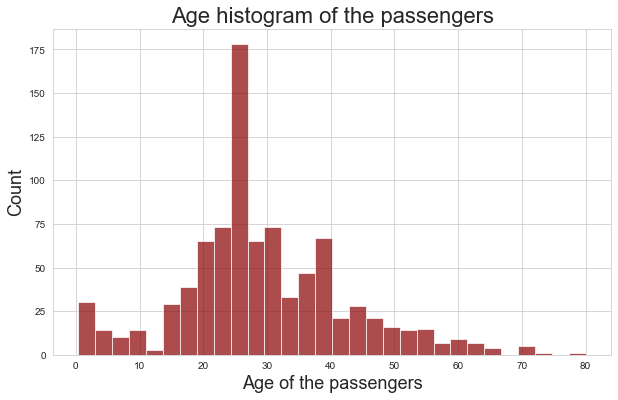

In [24]:
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the passengers",fontsize=22)
dataset_train['Age'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))

**Com es veurà la distribució d'edat entre les classes de passatgers?**

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

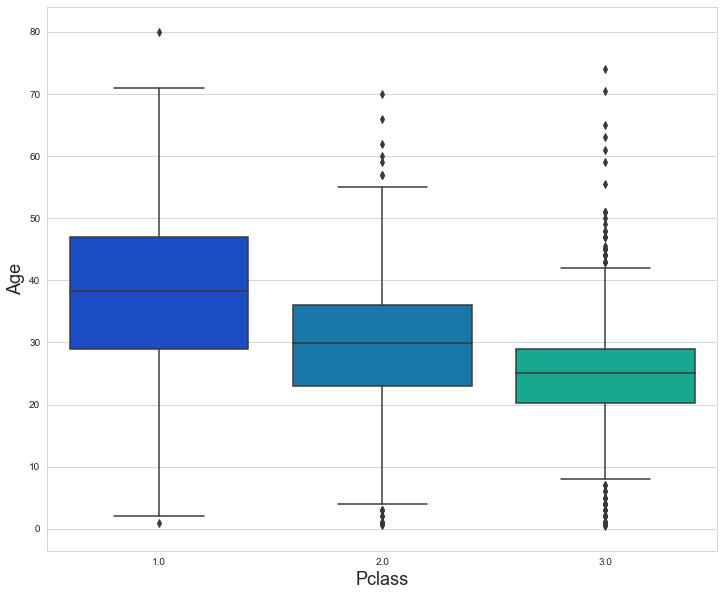

In [25]:
plt.figure(figsize=(12, 10))
plt.xlabel("Passenger Class",fontsize=18)
plt.ylabel("Age",fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=dataset_train,palette='winter')

Sembla que l'edat mitjana és diferent per a tres classes i generalment disminueix de la primera classe a la tercera.

Text(0.5, 0, 'Passenger class')

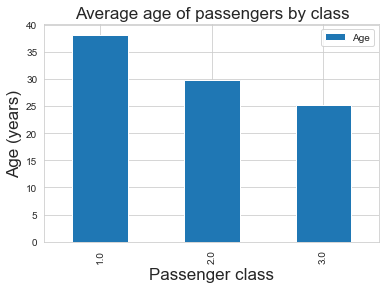

In [26]:
f_class_Age=dataset_train.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='Age')
plt.title("Average age of passengers by class",fontsize=17)
plt.ylabel("Age (years)", fontsize=17)
plt.xlabel("Passenger class", fontsize=17)

Per a realitzar un major analisis de les dades n'hem a veure la correlació entre les nostres variables. 

<Figure size 432x288 with 0 Axes>

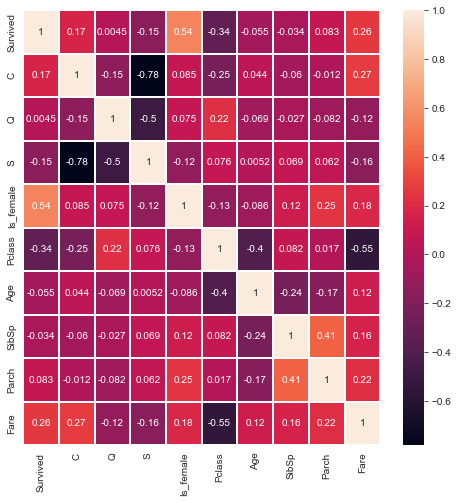

In [27]:
correlacio = dataset_train.corr()

plt.figure()
plt.subplots(figsize=(8,8))
ax = sns.heatmap(correlacio, annot=True, linewidths=.1)

Si ens fixem només en la variable y, és a dir, Survived; podem veure que té una alta correlació positiva
amb Is_female (el sexe) (primer les dones i els nens) i Fare. També cal destacar que hi ha una alta correlació negativa entre Fare i P_class.


Com que la variable Fare està correlacionada amb la nostra variable objectiu n'hem a estudiar la seva distribució.

**Com es veurà la distribució general de la tarifa?**

<AxesSubplot:title={'center':'Fare histogram of the passengers'}, xlabel='Fare of the passengers', ylabel='Count'>

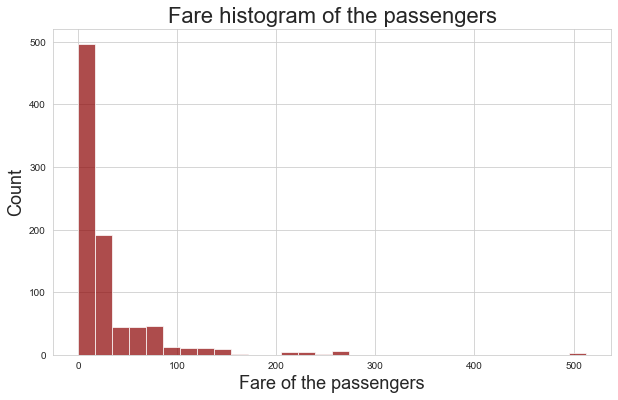

In [28]:
plt.xlabel("Fare of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Fare histogram of the passengers",fontsize=22)
dataset_train['Fare'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))

**Com es veurà la distribució d'edat entre les classes de passatgers?**

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

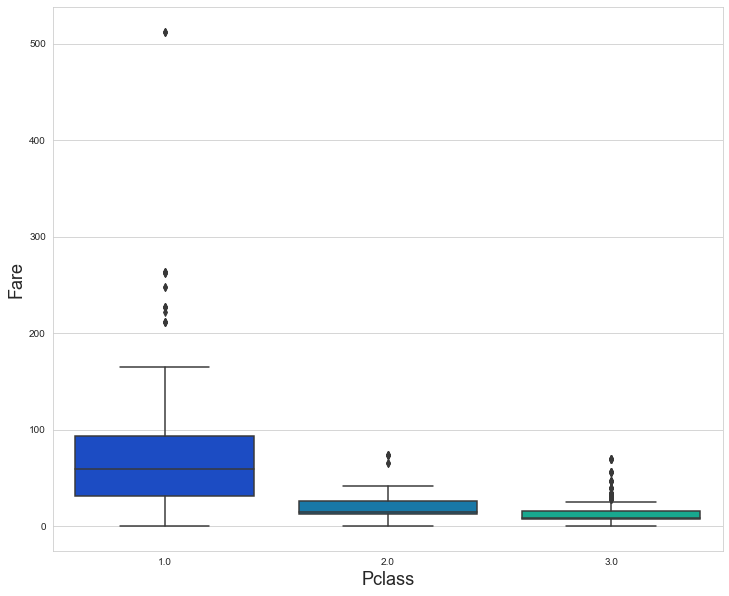

In [29]:
plt.figure(figsize=(12, 10))
plt.xlabel("Passenger Class",fontsize=18)
plt.ylabel("Fare",fontsize=18)
sns.boxplot(x='Pclass',y='Fare',data=dataset_train,palette='winter')

Podem veure que hi ha molts outliers per totes les classes, especialment elevats pels passatgers de primera classe. Això significa que no hi havia un preu estipulat pels bitllets i que a molts els van estafar amb el preu dels bitllets. Com és natural, el preu dels bitllets de primera classe és més elevat perquè es podien permetre gastar més que les altres classes.

Text(0.5, 0, 'Passenger class')

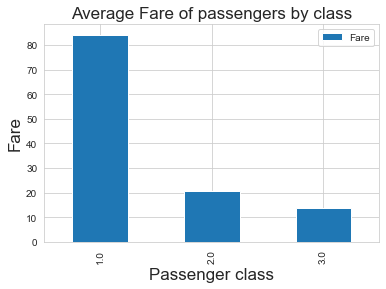

In [30]:
f_class_Fare=dataset_train.groupby('Pclass')['Fare'].mean()
f_class_Fare = pd.DataFrame(f_class_Fare)
f_class_Fare.plot.bar(y='Fare')
plt.title("Average Fare of passengers by class",fontsize=17)
plt.ylabel("Fare", fontsize=17)
plt.xlabel("Passenger class", fontsize=17)

En efecte, els de primera classe van pagar uns preus exorbitats pels bitllets.

Per estudiar de forma ràpida la distribució que hi ha entre les nostres variables :

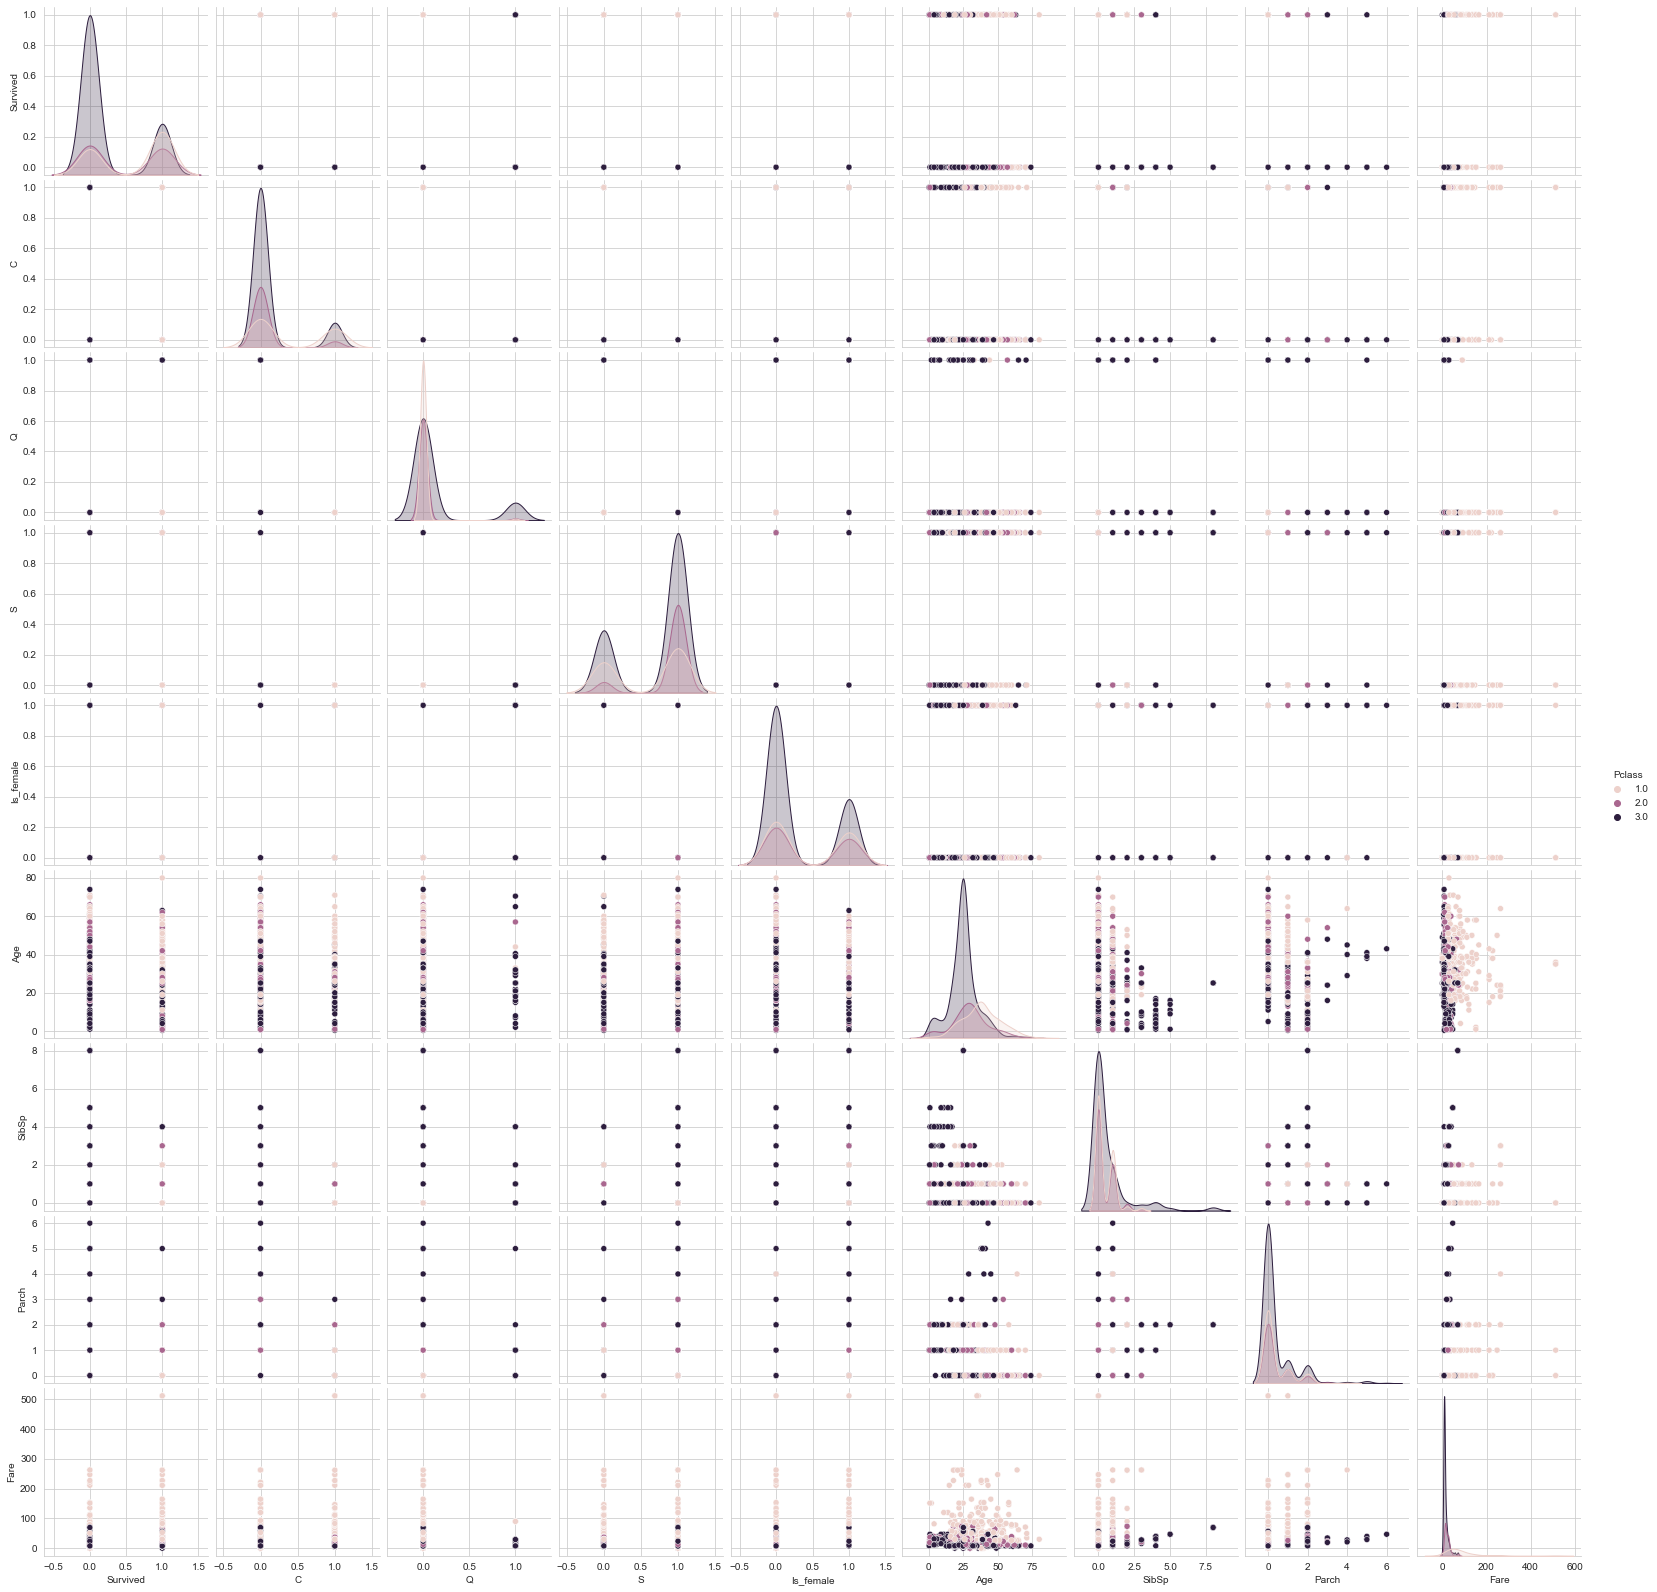

In [31]:
relacio = sns.pairplot(dataset_train, hue='Pclass')

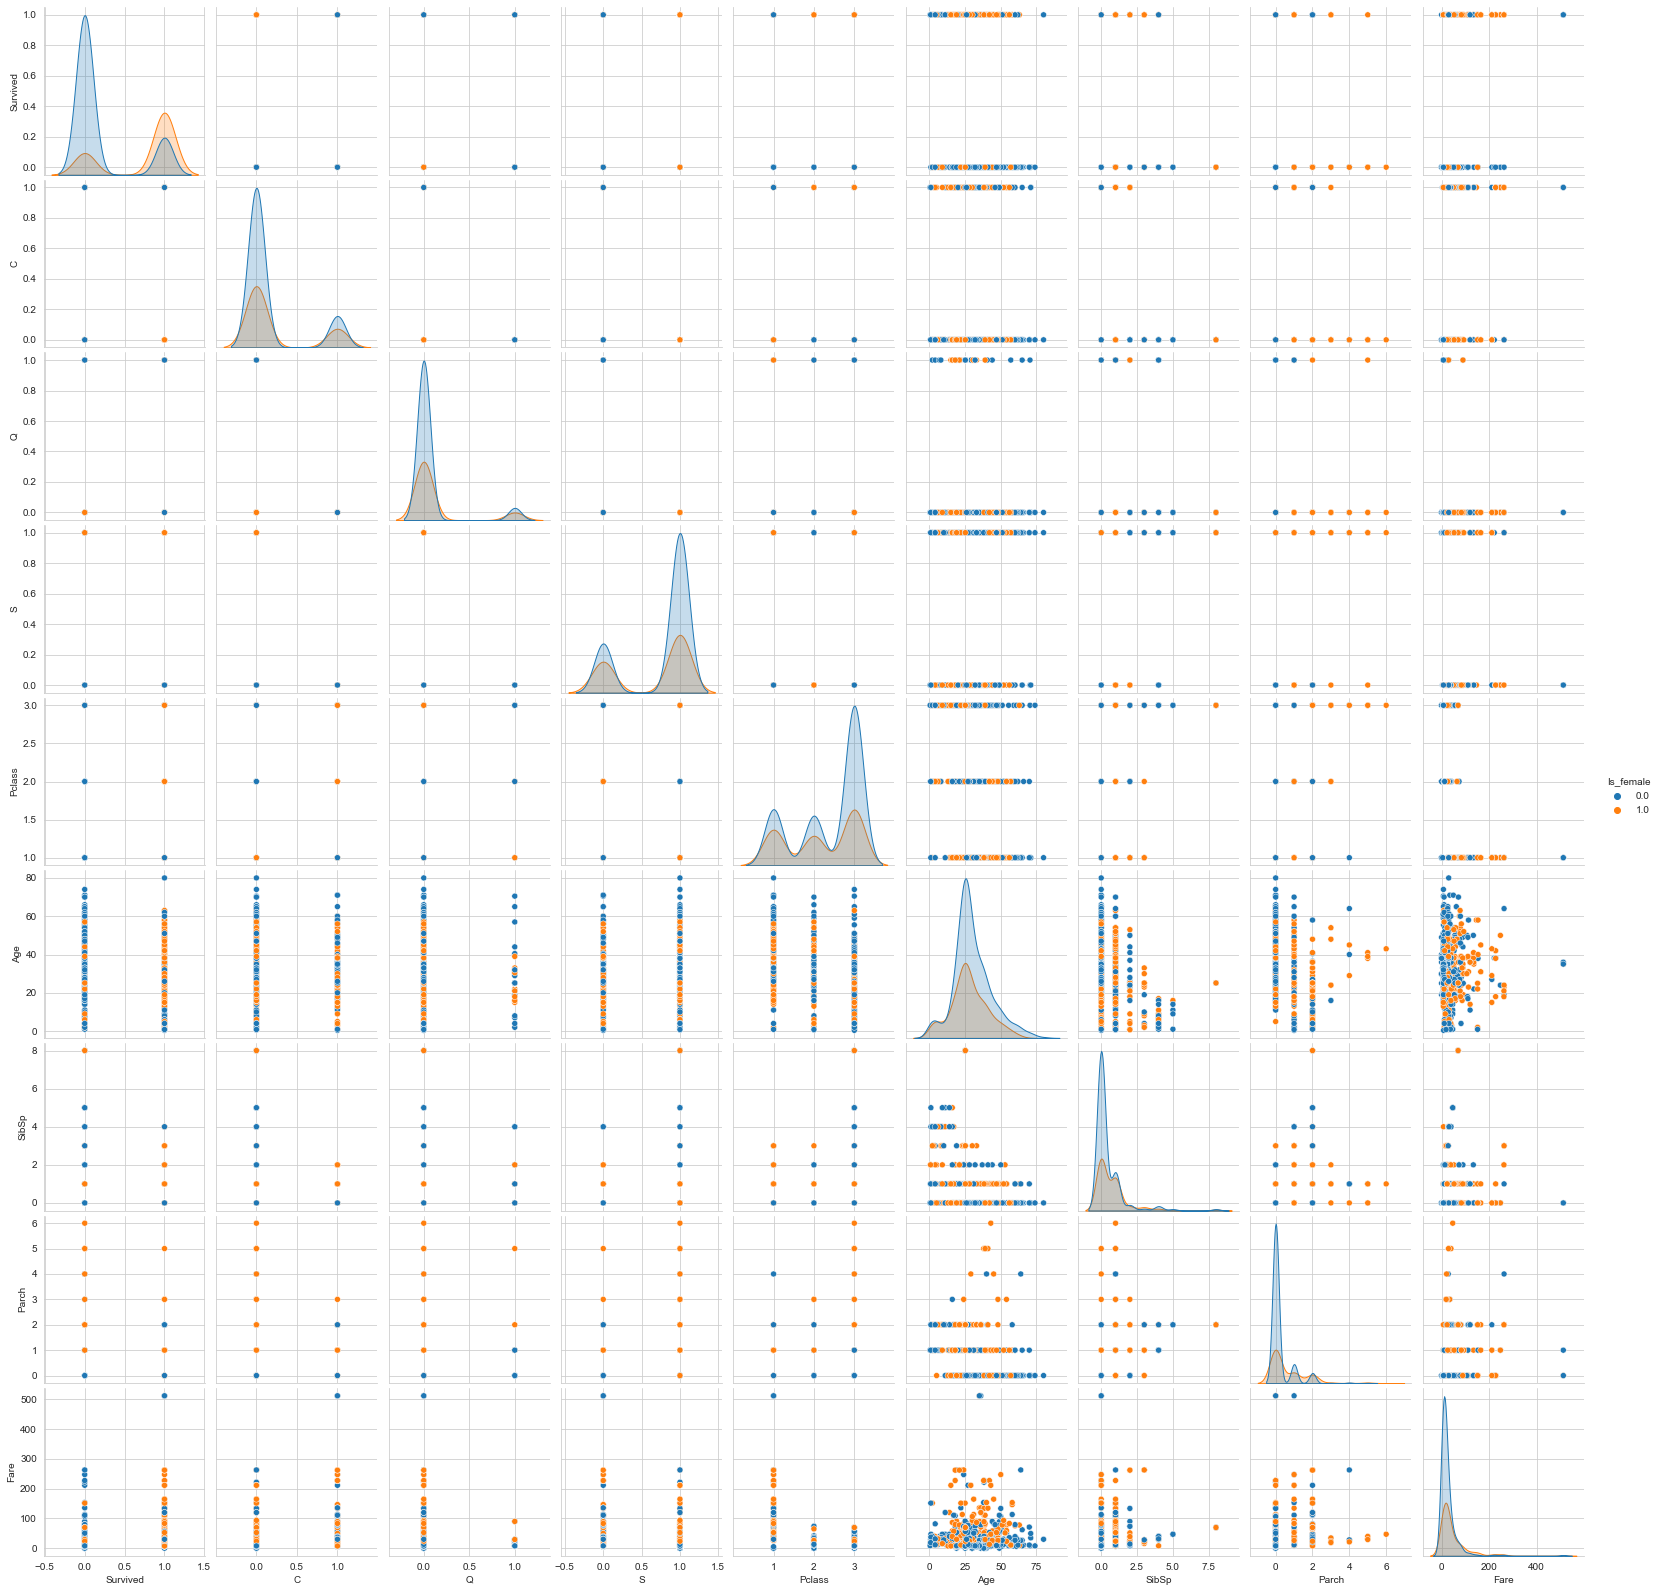

In [32]:
relacio = sns.pairplot(dataset_train, hue='Is_female')

Dels pairplots fet anteriorment no podem extreure cap informació nova que no hàgim vist ja.

Els gràfics amb valors booleans s'identifiquen fàcilment perquè es tracta només de dues columnes sobre el 0 i l'1. Les variables amb 2 o 3 categories les podem identificar perquè són gràfics amb 2 o 3 columnes, o punts si les combinem amb altres variables booleanes. Dels altres gràfics de dispersió l'objectiu és veure si els punts segueixen una
tendència o no. Les úniques combinacions no booleanes o categòriques són amb Age i Fare que no segueixen cap mena de distribució, són concentracions de punts sense cap ordre ni tendència.

## 2. Preprocessing (normalitzation, outlier removal, feature selection..)

Un cop vistes les dades de les que es disposa, per tal de tenir un aprenentatge més eficient, es recomana normalitzar les dades i treure outliers. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics..

En el nostre cas no cal que ens mirem els NaN, perquè ja els hem eliminat alhora de preparar el nostre dataset.

Aleshores, primer el que farem serà mirar si les dades estan normalitzades i si, en cas contrari, caldria normalitzar-les.

In [33]:
dataset_train.head()

,Survived,C,Q,S,Is_female,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.0,0.0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,0.0,0.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,0.0,0.0,1.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,0.0,1.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,0.0,1.0,0.0,3.0,35.0,0.0,0.0,8.0500


En el nostre dataset tenim moltes dades booleanes. Tot i així, sempre és molt important normalitzar els valors que tenim per poder estudiar-los millor i poder comparar millor les dades entre elles.

In [34]:
dataset_train_normalized = preprocessing.normalize(dataset_train, norm='l2');

I ara repetim els mateixos gràfics d'abans per estudiar si hi ha hagut algun canvi

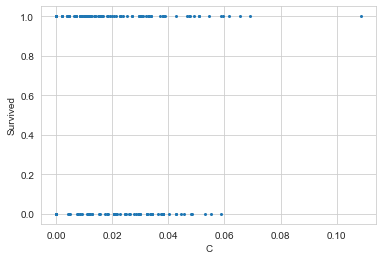

In [35]:
plt.figure()
plt.scatter(dataset_train_normalized[:, 1], dataset_train['Survived'], s=4)
plt.xlabel('C')
plt.ylabel('Survived')

plt.show()

Aquí podem veure que la distribució de persones que van sobreviure havent embarcat a Cherbourg és força similiar. Destaca un valor molt llunyà que podria tractar-se d'un outlier en el survived positiu.

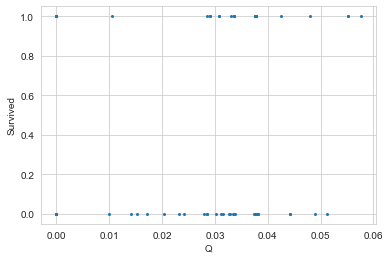

In [36]:
plt.figure()
plt.scatter(dataset_train_normalized[:, 2], dataset_train['Survived'], s=4)
plt.xlabel('Q')
plt.ylabel('Survived')

plt.show()

D'aquest gràfic podem veure com el volum de persones que van sobreviure havent embarcat a Queenstown és menor dels que van morir després de l'accident. Podem destacar també dos possibles outliers en el survived positiu.

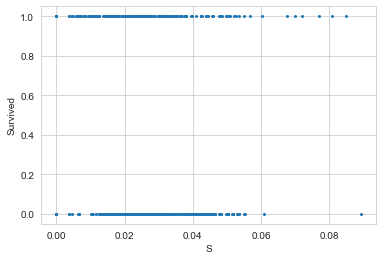

In [37]:
plt.figure()
plt.scatter(dataset_train_normalized[:, 3], dataset_train['Survived'], s=4)
plt.xlabel('S')
plt.ylabel('Survived')

plt.show()

Si ens fixem amb aquest scatter plot podem veure que la distribució de dades de les persones que van sobreviure havent embarcat a Southampton és molt diferent de les que van morir. Podem veure que les dades que indiquen els supervivents estan molt més distribuïdes al llarg de l'eix x, mentre que els punts de les persones que van morir estan més condensades a una regió. Això pot ser degut a que va haver-hi més persones supervivents que no pas mortes d'aquest punt d'embarcament.

Podem destacar també un possible outlier, però en aquest cas en el survived negatiu.

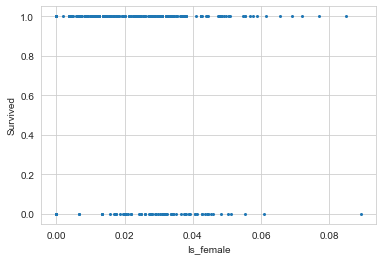

In [38]:
plt.figure()
plt.scatter(dataset_train_normalized[:, 4], dataset_train['Survived'], s=4)
plt.xlabel('Is_female')
plt.ylabel('Survived')

plt.show()

En aquest cas podem veure que la distribució de les dades de dones que van sobreviure a les que no també és molt diferent. D'aquí podem veure com efectivament, tenint en compte el valor de la correlació entre la variable *Is_female* i *Survived* que hem calculat anteriorment, hi ha més dones que van sobreviure que no pas dones que van morir despres de l'accident. També podem detectar un possible outlier com a dona que no va sobreviure.

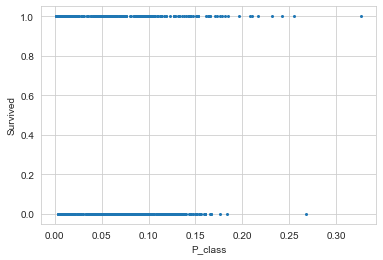

In [39]:
plt.figure()
plt.scatter(dataset_train_normalized[:, 5], dataset_train['Survived'], s=4)
plt.xlabel('P_class')
plt.ylabel('Survived')

plt.show()

Si en fixem en aquesta distribució de dades, podem veure com a major classe més persones hi ha sobreviscudes.
Hi ha més persones que van sobreviure de classes superiors que no pas de les classes inferiors, ja que en *Survivev* = 0 el volum de persones tendeix a estar a l'esquerra, mentre que en *Survived* = 1 les dades estan més distribuïdes.

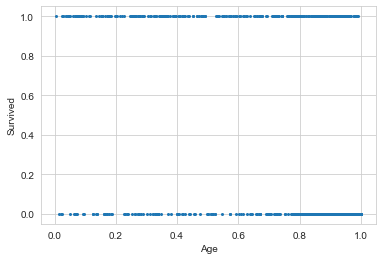

In [40]:
plt.figure()
plt.scatter(dataset_train_normalized[:, 6], dataset_train['Survived'], s=4)
plt.xlabel('Age')
plt.ylabel('Survived')

plt.show()

D'aquí podem veure que la densitat de persones que no van sobreviure a l'accident és diferent segons l'edat. Si ens fixem en la franja de persones amb edat baixa, el volum de persones no és tan dens com en la franja de persones amb edat més alta. 

Relacionant això amb el nombre de dones supervivents, podem deduïr que el criteri per salvar als diferents passatgers va ser per *primer salvem a les dones i els nens*.

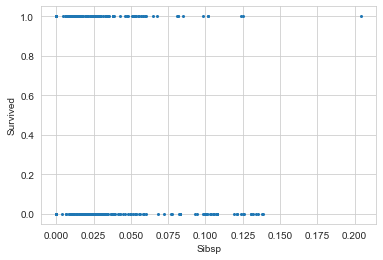

In [41]:
plt.figure()
plt.scatter(dataset_train_normalized[:, 7], dataset_train['Survived'], s=4)
plt.xlabel('Sibsp')
plt.ylabel('Survived')

plt.show()

Sorprenentment, la densitat de les dades en aquest scatter plot és molt igual. Que una persona tingués fills o no, no va ser un criteri per salvar a una persona. Per mirar de relacionar-ho amb l'argument anterior, calculem el nombre de dones i d'homes que hi havia en el dataset.

In [42]:
n_dones = sum(dataset_train['Is_female'])
n_homes = len(dataset_train['Is_female']) - n_dones

print("Nombre de dones en el vaixell", n_dones)
print("Nombre d'homes en el vaixell", n_homes)

Nombre de dones en el vaixell 312.0
Nombre d'homes en el vaixell 577.0


Tenint en compte aquestes dades, continuaria tenintn sentit el criteri mencionat anteriorment.


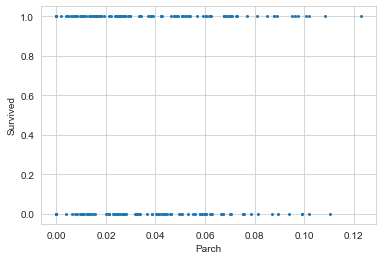

In [43]:
plt.figure()
plt.scatter(dataset_train_normalized[:, 8], dataset_train['Survived'], s=4)
plt.xlabel('Parch')
plt.ylabel('Survived')

plt.show()

En aquest cas, com abans, podem veure com les distribucions són molt semblants tant en els nens que van sobreviure com dels que no.

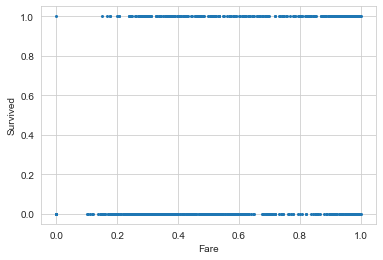

In [44]:
plt.figure()
plt.scatter(dataset_train_normalized[:, 9], dataset_train['Survived'], s=4)
plt.xlabel('Fare')
plt.ylabel('Survived')

plt.show()

Sorprenentment, podem veure com un major cost del preu del bitllet no va garantir la supervivencia dels passatgers. Podem veure com en el l'extrem dret, que correpondria amb la gent que va pagar més diners, hi ha molt volum de persones, tant com en persones mortes com supervivents.


Després d'estudiar les diferents variables normalitzades, podem determinar que en el nostre cas no seria necessari realitzar aquest procés. La gran majoria de les nostres dades amb les que treballem són dades binàries, les quals són 0 i 1. De les poques columnes que tenim amb un valor int és l'edat i el preu del bitllet. Aquestes dues sí que poden normalitzar-se, però podem treballar amb elles sense normalitzar-les sense cap mena de problema.

En el nostre dataset no caldria aplicar un PCA, ja que aquest anàlisis de les dades s'ha d'utilitzar quan hi ha una forta correlació entre les variables. La relació entre les nostres variables és dèbil, ho hem vist en l'anterior apartat amb el heatmap de correlacions. Degut a això, PCA amb el nostre dataset no podria funcionar bé per reduir la dimensionalitat de les dades.

Les Polynomial Features són aquelles característiques creades per elevar les característiques existents a un exponent.

Per exemple, si un conjunt de dades tingués una característica d'entrada X, llavors una característica polinomial seria l'addició d'una nova característica (columna) on els valors es calculin fent el cuadrat dels valors de X, per exemple $X^2$. Aquest procés es pot repetir per a cada variable d'entrada en el conjunt de dades, creant una versió transformada de cadascuna.

En el nostre dataset la majoria de variables són binàries (fer-ne el cuadrat no les modificaria en res) per tant el Polinomyal Features no té sentit fer-lo en el nostre dataset, no modificaria practicament res (només els valors age i fare) i no milloraria en res la classificació (perquè una edad de $66^2$ no tindira sentit modelitzar-la ni tampoc modelitzar els quadrats dels preus que ya són molt alts).

## 3. Model Selection
En aquesta secció valorarem quina o quines tècniques volem fer servir, així com explicar el perquè les hem seleccionat.
Per poder comparar millor els nostres resultats, farem servir diferents matrius de confusió i estudiarem els resultats dels models a partir dels coeficients de la matriu.


In [45]:
def confusion_matrix(y, y_pred):
    confusion_matrix = metrics.confusion_matrix(y, y_pred)
    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

#### 3.1 Suport Vector Machine (SVM)

Les màquines vectorials de suport (SVMs) són un conjunt de mètodes d'aprenentatge supervisats utilitzats per a la classificació, la regressió i la detecció d'outliers. L'objectiu de l'algorisme de la màquina vectorial de suport és trobar un hiperplà en un espai N-dimensional (N - el nombre de característiques) que classifiqui clarament els punts de dades.

Els avantatges de les màquines vectorials de suport són:

* Efecte en espais de dimensió alta.

* Encara efectiu en els casos en què el nombre de dimensions és més gran que el nombre de mostres.

* Utilitza un subconjunt de punts d'entrenament en la funció de decisió (anomenats vectors de suport), de manera que també és eficient en memòria.

Els desavantatges de les màquines vectorials de suport inclouen:

* Si el nombre de característiques és molt més gran que el nombre de mostres, evitem l'over-fitting en l'elecció de les funcions del nucli i el terme de regularització és crucial.

* Els SVMs no proporcionen directament estimacions de probabilitat, es calculen utilitzant una costosa validació creuada cinc vegades.

Podem utilitzar una màquina vectorial de suport (SVM) quan les dades tenen exactament dues classes. Un SVM classifica les dades trobant el millor hiperplà que separa tots els punts de dades d'una classe dels de l'altra classe. El millor hiperplà per un SVM significa el que té el marge més gran entre les dues classes. Marge significa l'amplada màxima de separació paral·lela a l'hiperplà que no té punts de dades interiors. Per a una millor comprensió observeu la següent imatge:

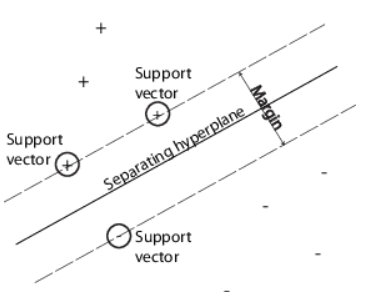

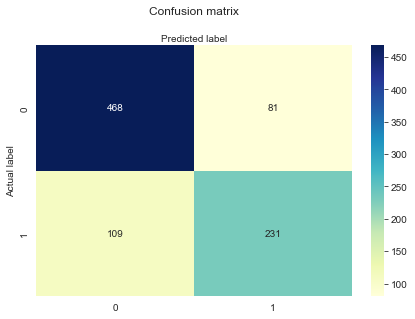

In [46]:
from sklearn import svm
from sklearn import metrics

X = dataset_train.values[:, 1:]
y = dataset_train.values[:,:1]
y = np.array(y)
y = np.reshape(y, (889,))

# instantiate the model (using the default parameters) amb kernel lineal

clf = svm.SVC(kernel='linear', C=1, random_state=42)

clf.fit(X, y)

y_pred = clf.predict(X)

confusion_matrix(y, y_pred)


Una matriu de confusió, també anomenada matriu d'error, és una taula que permet veure com de bo és un model de regressió. Cada columna de la matriu representa les instàncies de la classe amb la que estem treballant, mentre que cada fila treballa amb les dades predites d'aquell model.

* La casella (0,0) indica els valors positius de veritat. Aquests són aquells valors que el model ha predit correctament que han mort.

* La casella (0,1) indica aquelles persones que el model ha predit com a mortes però que realment estan vives.

* La casella (1,0) indica aquelles persones que se les ha considerat vives, però que realment van morir després de l'accident.

* La casella (1,1) indica les persones que realment van sobreviure l'accident.

Les caselles més importants són les (0,1) i (1,0). Aquestes indiquen valors que el nostre model ha predit malament. Persones que s'han comptat com a mortes i eren vives i viceversa. Per tal que un model sigui perfecte, aquestes dues caselles haurien de tenir un 0; com més proper siguin a zero millor fa el model les prediccions. 

A continuació considerem el SVM amb el diferents kernels implementats.:

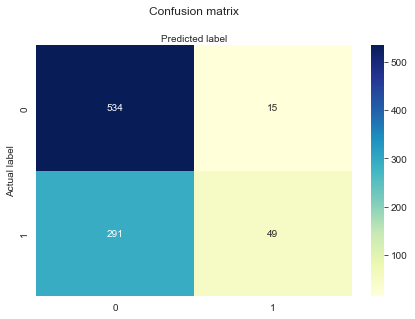

In [47]:
# Amb kernel polinomial de primer ordre

clf = svm.SVC(kernel='poly', C=1, random_state=42)

clf.fit(X, y)

y_pred = clf.predict(X)

confusion_matrix(y, y_pred)

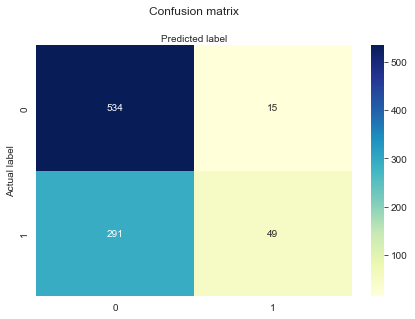

In [48]:
# Amb kernel polinimial de tercer ordre

clf = svm.SVC(kernel='poly', degree = 3 , random_state=42)

clf.fit(X, y)

y_pred = clf.predict(X)

confusion_matrix(y, y_pred)

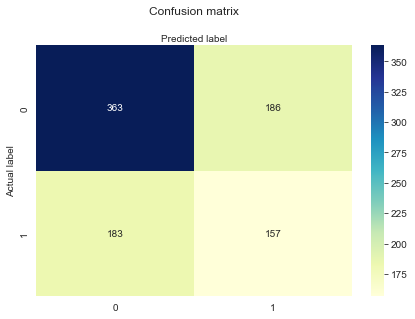

In [49]:
# Amb kernel sigmoid

clf = svm.SVC(kernel='sigmoid', C=1, random_state=42)

clf.fit(X, y)

y_pred = clf.predict(X)

confusion_matrix(y, y_pred)

Prioritzant els valors de les caselles (0,1) i (1,0) podem veure que el millor kernel a emprear per a SVM és el lineal.

#### 3.2 Logistic regression

A continuació farem un estudi amb una regressió logística.

La regressió logística és un algorisme d'aprenentatge automàtic que es pot utilitzar per modelar la probabilitat d'una classe o esdeveniment determinat. S'utilitza quan les dades són linealment separables i el resultat és binari o dicotòmic en la naturalesa. Això significa que la regressió logística s'utilitza normalment per a problemes de classificació binària.

Tot i el seu nom, és més aviat un model de classificació lineal en comptes d'un model de regressió. Permet classificar de manera eficient diferents valors binaris dins d'una regressió. La següent imatge pot ajudar a entendre-ho millor:

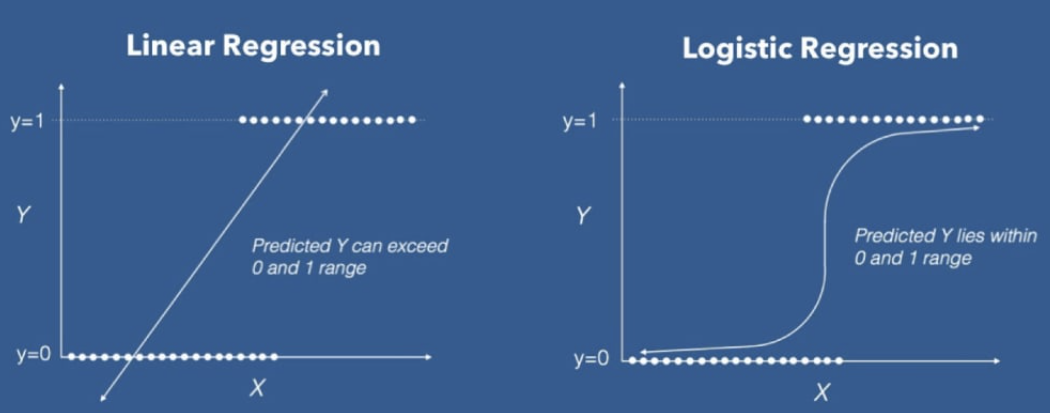

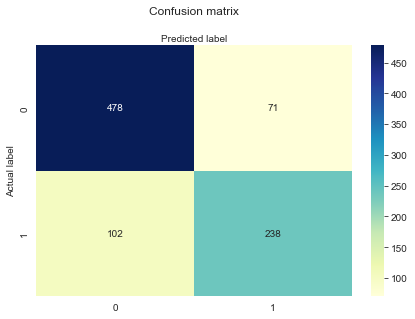

In [50]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

logreg.fit(X, y)

y_pred = logreg.predict(X)

confusion_matrix(y, y_pred)

En aquest cas tenim 23 persones que s'han donat per mortes però que van sobreviure i 138 persones que es van considerar vives però que realment van morir. Per tant, considerem que el nostre model s'hauria de millorar.


#### 3.3 Perceptró

El perceptró és un model d'aprenentatge supervisat per a classificadors binaris. És un tipus de classificador lineal, i és considerada la forma més senzilla de xarxa neuronal.
Consisteix en un sol node o neurona que pren una fila de dades com a entrada i prediu una etiqueta d'una classe o un altre. A continuació us presentem una representació d'un perceptró:

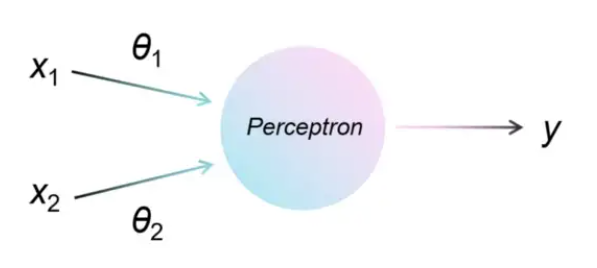

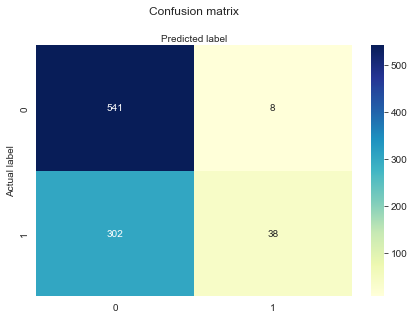

In [51]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

y_pred = clf.predict(X)

confusion_matrix(y, y_pred)

#### 3.4 Random Forest

Ara anem a provar amb un *Random Forest*, el qual és un *ensemble method*. Aquests tenen com objectiu combinar diferents prediccions per tal de millorar-les. 

El Random Forests, com el seu nom implica, consisteix en un gran nombre d'arbres de decisió individuals que operen com un conjunt. Cada arbre individual del Random Forest treu una predicció de classe i la classe amb més vots es converteix en la predicció del nostre model (vegeu la figura més avall).

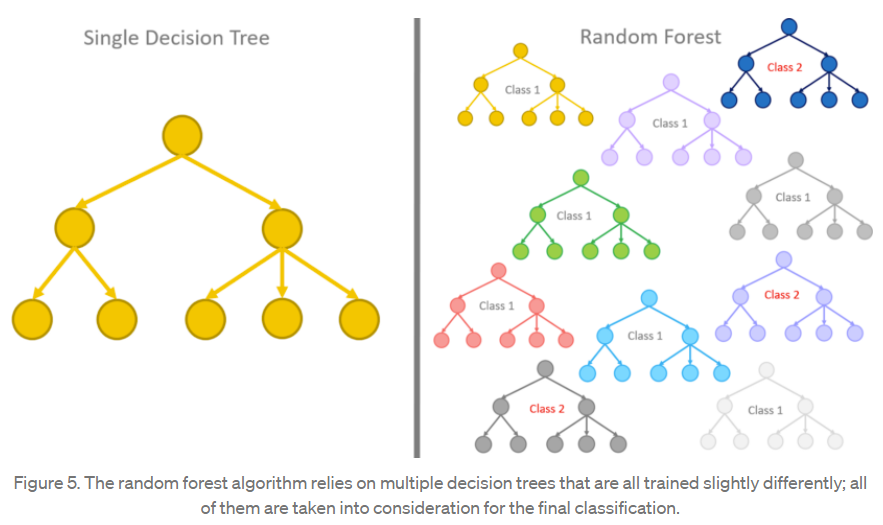

A continuació aplicarem un *Random Forest* en el nostre dataset.

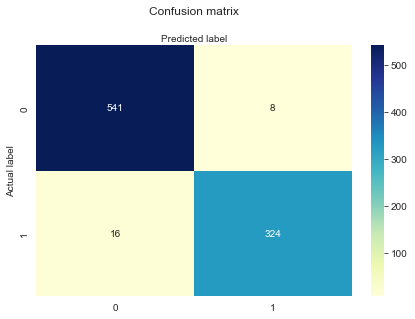

In [52]:
from sklearn.ensemble import RandomForestClassifier

rnd_forest = RandomForestClassifier(n_estimators=15)
rnd_forest = rnd_forest.fit(X, y)

y_pred = rnd_forest.predict(X)
confusion_matrix(y, y_pred)

Podem veure com aquesta última matriu de confusió és molt millor que les altres dues. Els valors de la diagonal són molt alts, mentre que els de la diagonal invertida són molt propers a 0, fet que no passa amb cap de les altres tres matrius de confusió anteriors. És per això que nosaltres afirmem que és convenient fer un *ensable method*, ja que els resultats que s'obtenen són millors que en els altres mètodes.

### 4. Crossvalidation

Aprendre els paràmetres d'una funció de predicció i provar-la en les mateixes dades és un error metodològic: un model que simplement repetiria les etiquetes de les mostres que acaba de veure tindria una puntuació perfecta, però no prediria res útil en dades encara desaparegudes. Aquesta situació es diu overfitting. 

Per evitar-ho, és una pràctica habitual en realitzar un experiment d'aprenentatge automàtic (supervisat), mantenir una part de les dades disponibles com un conjunt de proves X.test, y.test. 

Quan s'avaluen diferents hyperparametres per als estimadors, encara hi ha un risc de fer overfitting en el conjunt de proves perquè els paràmetres es poden ajustar fins que l'estimador faci la millor predicció. D'aquesta manera, el coneixement sobre el conjunt de proves pot "aprendre" en el model i les mètriques d'avaluació ja no informen sobre el rendiment de la generalització. 

Per resoldre aquest problema, una altra part del conjunt de dades es pot mantenir com un "conjunt de validació": l'entrenament continua en el conjunt d'entrenament, després de l'avaluació es realitza en el conjunt de validació, i quan l'experiment sembla tenir èxit, l'avaluació final es pot fer en el conjunt de proves. Fer això reduiria molt els conjunts d'entrenament i, per tant, per a bases de dades molt petites no es podria entrenar bé el model.

Degut a això és important cross-validar les dades d'entrenament, perquè el model pugui aprendre sense fer overfitting. Cross-validar la base de dades consistiria en :

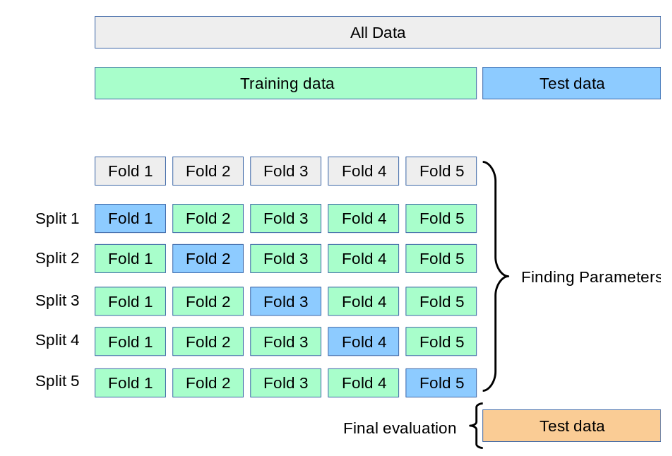


Com que hi han diverses maneres de fer cross-validation (CV) n'hem a probar amb els diferents models escollits en el punt anterior.

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Tornem a carregar les dades del nostre dataset
X = dataset_train.values[:, 1:]
y = dataset_train.values[:,:1]
y = np.array(y)
y = np.reshape(y, (889,))

#Separem les dades en 2 conjunts: Train i Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#Ejecutem el model (este es con Suport Vector Machine)
clf = svm.SVC(kernel='linear', C=1, random_state=42)

La funció cross_val_score ajuda a fer cross-validation en el dataset per a estimar la variable objectiu i proporciona un score (puntuació). Els estimats tenen un mètode de puntuació que proporciona un criteri d'avaluació per defecte del problema que estan dissenyats per resoldre. En altres paraules, la variable score és com de fiable / precís és el model després de fer el CV.

#### Suport Vector Machine (SVM)

El següent exemple mostra com estimar la precisió d'una màquina vectorial de suport lineal del nucli en el nostre conjunt de dades dividint les dades, ajustant un model i calculant la puntuació 5 vegades consecutives (amb diferents divisions cada vegada):

In [54]:
#Fem cross-validation
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.7873992255443407

Per defecte, la puntuació calculada a cada iteració del CV és el mètode de puntuació de l'estimador. És possible canviar-ho usant el paràmetre scoring. Aquest paràmetre especifica una de les possibles eines d'avaluació (mètriques) de models que utilitzen la CV. En el pròxim punt escollirem quina mètrica utilitzarem.

In [55]:
from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=5, scoring='f1') # f1 is a scoring classification for binary targets
scores.mean()

0.7087144971217552

Com que les mostres estan equilibrades entre les classes objectiu, la precisió i la F1-score són gairebé iguals.


També és possible utilitzar altres estratègies de CV fent Cross-Validation de permutació aleatòria amb un ShuffleSplit. Fa un rendiment d'índexs per dividir les dades en conjunts d'entrenament i proves:

In [56]:
from sklearn.model_selection import ShuffleSplit
import statistics

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clf, X, y, cv=cv)
print('List of possible accuracy:', scores)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(scores)*100, '%')
print('\nMinimum Accuracy:',
      min(scores)*100, '%')
print('\nOverall Accuracy:',
      statistics.mean(scores)*100, '%')

List of possible accuracy: [0.77153558 0.81273408 0.78277154 0.7752809  0.83520599]

Maximum Accuracy That can be obtained from this model is: 83.52059925093633 %

Minimum Accuracy: 77.15355805243446 %

Overall Accuracy: 79.5505617977528 %


També podem provar de fer cross-validation amb KFold. El KFold divideix totes les mostres en k grups de mostres, anomenats plecs, de mides iguals (si és possible). La funció de predicció s'aprèn usant k-1 plecs, i el plec que queda s'utilitza per a la prova. Aquí hi ha una visualització del comportament de Cross-Validation. Tingueu en compte que KFold no està afectat per classes o grups.
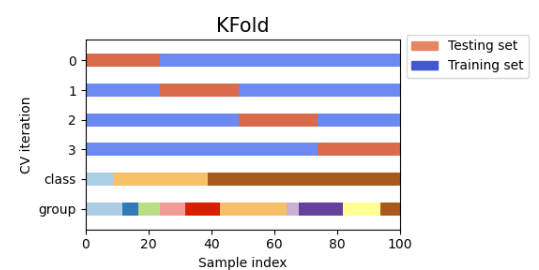

Hi ha molts tipus de KFold, però nosaltres hem decidit fer el StratifiedKFold perquè ens semblava el més adient per al nostre problema de dues classes (si sobreviu o no). Aquest objecte de Cross-Validation és una variació de KFold que retorna plecs estratificats. Els plecs es fan preservant el percentatge de mostres per a cada classe. Però encara ens queda saber quina k escollir, així que provarem diferents valors.

In [57]:
from sklearn.model_selection import StratifiedKFold

clf = svm.SVC(kernel='linear', C=1, random_state=42) 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      statistics.mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.8202247191011236, 0.8202247191011236, 0.7415730337078652, 0.8426966292134831, 0.7191011235955056, 0.7640449438202247, 0.7415730337078652, 0.797752808988764, 0.8089887640449438, 0.8068181818181818]

Maximum Accuracy That can be obtained from this model is: 84.26966292134831 %

Minimum Accuracy: 71.91011235955057 %

Overall Accuracy: 78.6299795709908 %


In [58]:
clf = svm.SVC(kernel='linear', C=1, random_state=42) 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      statistics.mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.8202247191011236, 0.7921348314606742, 0.7471910112359551, 0.7696629213483146, 0.807909604519774]

Maximum Accuracy That can be obtained from this model is: 82.02247191011236 %

Minimum Accuracy: 74.71910112359551 %

Overall Accuracy: 78.74246175331683 %


In [59]:
clf = svm.SVC(kernel='linear', C=1, random_state=42) 
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      statistics.mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.797979797979798, 0.75, 0.8108108108108109]

Maximum Accuracy That can be obtained from this model is: 81.08108108108108 %

Minimum Accuracy: 75.0 %

Overall Accuracy: 78.62635362635363 %


Ara provem tot el que hem fer per SVM amb Logistic Regression i el Perceptró.

#### Logistic Regression

In [60]:
clf = LogisticRegression(random_state=16)

In [61]:
#Fem cross-validation
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.7953151780613217

In [62]:
scores = cross_val_score(clf, X, y, cv=5, scoring='f1') # f1 is a scoring classification for binary targets
scores.mean()

0.7194402841781874

In [63]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clf, X, y, cv=cv)
scores.mean()

0.8029962546816479

In [64]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      statistics.mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.8202247191011236, 0.8089887640449438, 0.7528089887640449, 0.8426966292134831, 0.7191011235955056, 0.7640449438202247, 0.8314606741573034, 0.8202247191011236, 0.8426966292134831, 0.7954545454545454]

Maximum Accuracy That can be obtained from this model is: 84.26966292134831 %

Minimum Accuracy: 71.91011235955057 %

Overall Accuracy: 79.97701736465781 %


In [65]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      statistics.mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.8258426966292135, 0.797752808988764, 0.7528089887640449, 0.8202247191011236, 0.8248587570621468]

Maximum Accuracy That can be obtained from this model is: 82.58426966292134 %

Minimum Accuracy: 75.28089887640449 %

Overall Accuracy: 80.42975941090586 %


In [66]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      statistics.mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.797979797979798, 0.7837837837837838, 0.8277027027027027]

Maximum Accuracy That can be obtained from this model is: 82.77027027027027 %

Minimum Accuracy: 78.37837837837837 %

Overall Accuracy: 80.31554281554281 %


#### Perceptró

In [67]:
clf = Perceptron(tol=1e-3, random_state=0)

In [68]:
#Fem cross-validation
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.6413000698279693

In [69]:
scores = cross_val_score(clf, X, y, cv=5, scoring='f1') # f1 is a scoring classification for binary targets
scores.mean()

0.6207201359793817

In [70]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clf, X, y, cv=cv)
scores.mean()

0.7265917602996255

In [71]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      statistics.mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.8089887640449438, 0.6179775280898876, 0.6179775280898876, 0.4606741573033708, 0.6067415730337079, 0.6966292134831461, 0.6741573033707865, 0.6067415730337079, 0.7752808988764045, 0.6590909090909091]

Maximum Accuracy That can be obtained from this model is: 80.89887640449437 %

Minimum Accuracy: 46.06741573033708 %

Overall Accuracy: 65.24259448416751 %


In [72]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      statistics.mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.38202247191011235, 0.7191011235955056, 0.7247191011235955, 0.7471910112359551, 0.615819209039548]

Maximum Accuracy That can be obtained from this model is: 74.71910112359551 %

Minimum Accuracy: 38.20224719101123 %

Overall Accuracy: 63.77705833809433 %


In [73]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      statistics.mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.7609427609427609, 0.6182432432432432, 0.652027027027027]

Maximum Accuracy That can be obtained from this model is: 76.0942760942761 %

Minimum Accuracy: 61.82432432432432 %

Overall Accuracy: 67.70710104043437 %


#### Random Forest

In [74]:
clf = RandomForestClassifier(random_state=15)

In [75]:
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.803161302609027

In [76]:
scores = cross_val_score(clf, X, y, cv=5, scoring='f1') # f1 is a scoring classification for binary targets
scores.mean()

0.7376689458193798

In [77]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clf, X, y, cv=cv)
scores.mean()

0.8149812734082398

In [78]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      statistics.mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.797752808988764, 0.7640449438202247, 0.8539325842696629, 0.8651685393258427, 0.7865168539325843, 0.7303370786516854, 0.8426966292134831, 0.8202247191011236, 0.8314606741573034, 0.8181818181818182]

Maximum Accuracy That can be obtained from this model is: 86.51685393258427 %

Minimum Accuracy: 73.03370786516854 %

Overall Accuracy: 81.10316649642493 %


In [79]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      statistics.mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.7696629213483146, 0.8764044943820225, 0.7584269662921348, 0.797752808988764, 0.8305084745762712]

Maximum Accuracy That can be obtained from this model is: 87.64044943820225 %

Minimum Accuracy: 75.84269662921348 %

Overall Accuracy: 80.65511331175014 %


In [80]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      statistics.mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.797979797979798, 0.7804054054054054, 0.8344594594594594]

Maximum Accuracy That can be obtained from this model is: 83.44594594594594 %

Minimum Accuracy: 78.04054054054053 %

Overall Accuracy: 80.42815542815542 %


Observant els percentatges de puntuació, és a dir, observant la variable score que puntua com de bé s'ha fet la predicció en el conjunt test després de fer l'entrenament; podem afirmar que de moment el perceptró és el model menys precís en comparació amb Logistic Regresion i SVM, que són molt semblants entre si respecte de l'accuracy.

Pels valors de la k en fer el StratifiedKFold hem probat amb 10, 5 i 3 per a tots els models que estem estudiant. En disminuir la k de 10 a 5 l'accuracy del Perceptró i del Suport Vector Machine augmenten, però per k més petites torna a disminuir. En canvi, la regressió logística troba la seva accuracy més alta amb k=10 i disminueix la seva accuracy a mesura que disminueix la k.

Per a fixar una estratègia de CV hem decidit utilitzar un **ShuffleSplit** perquè ens pot donar també un interval de confiança per a l'accuracy, cosa que ens sembla més útil i flexible per a fer les comparacions, com ho hem fet en el KFold. I també fa les particions de forma aleatòria, cosa que ens sembla millor per a entrenar i avaluar el nostre model.

LeaveOneOut (o LOO) és una simple CV. Cada conjunt d'aprenentatge es crea prenent totes les mostres excepte una, el conjunt de proves és la mostra que s'ha deixat. Així, per a n mostres, tenim diferents conjunts d'entrenament i n diferents conjunts de proves. Aquest procediment de Cross-Validation no malgasta massa dades, ja que només s'elimina una mostra del conjunt d'entrenament.

El LOO és computacionalment més car que la CV K-Fold. En termes de precisió, LOO sovint resulta en una gran variància com a estimador de l'error de prova. Intuïtivament, perquè n-1 de les n mostres s'utilitzen per construir cada model, els models construïts a partir de plecs són pràcticament idèntics entre si i al model construït a partir de tot el conjunt d'entrenament.

No obstant això, si la corba d'aprenentatge és pronunciada per la mida d'entrenament en qüestió, llavors la validació creuada de 5 o 10 plecs pot sobreestimar l'error de generalització.

LOO fa un nou model 889 vegades (perquè tenim 889 files) i per cada model fa un entrenament amb 888 files i fa el test amb 1 fila. Aquesta fila de test canvia per a cada model que fa. Com que tenim moltes files en el nostre dataset i no tenim tot el temps del món perquè sóm matematics/enginyers i estem molts ocupats per passar-nos hores esperant a que s'executi el programa.

### 5. Metric Analysis
En aquest apartat ens centrarem en les mètriques de classificació.

Una mètrica de classificació és un nombre que mesura el rendiment que té el teu model d'aprenentatge automàtic a l'hora de classificar les dades en diferents classes. Utilitzant diferents mètriques per a l'avaluació del rendiment, hauríem de ser capaços de millorar el poder predictiu general del nostre model abans de desplegar-lo per a la producció sobre dades no vistes. Per al nostre problema, tenim 3 possibles mètriques a escollir :

* **accuracy_score ->** Puntuació de l'accuracy. Correspon a la suma de tots els correctament classificats entre totes les classificacions realitzades.

* **f1_score -->** Calcula la F1-score, també coneguda com a F-score equilibrada o F-measure. La F1-score es pot interpretar com una mitjana harmònica de la precisió i la recall, on una F1-score arriba al seu millor valor a 1 i la pitjor puntuació a 0. La contribució relativa de la precisió i la recall a la F1-score són iguals. La fórmula per a la F1-score és: $F1 = \frac{2 * (precisió * recall)}{(precisió + recall)}$. Dóna una millor mesura dels casos classificats incorrectament que l'accuracy_score.

* **average_precision_score -->** Calcula la precisió mitjana (AP) de les puntuacions de predicció. AP resumeix una corba de precisió-recall com la mitjana ponderada de les precisions aconseguides a cada llindar, amb l'augment de la recall del llindar anterior utilitzat com a pes: $AP = \sum(R_{n} - R_{n-1})*Pn$ on Pn i Rn són la precisió i la recall al llindar enèsim. Aquesta implementació no és interpolada i és diferent de calcular l'àrea sota la corba de precisió de crida amb la regla trapezoïdal, que utilitza la interpolació lineal i pot ser massa optimista. Nota: aquesta implementació està restringida a la tasca de classificació binària o a la tasca de classificació multietiqueta. És una mètrica útil per comparar com de bé estan els models ordenant les prediccions, sense considerar cap llindar de decisió específic.


L'average_precision_score del model no varia per cada llindar, mentre que el F1-score canvia per a cada variació que li fem al llindar. Així que entre F1-score i average_precision_score escollim el primer per a poder veure com millora o empitjora si canviem el valor del threshold.

Una diferència entre l'accuracy_score i la f1_score és que la segona dona una millor mesura dels casos classificats incorrectament que l'accuracy_score. En el nostre problema volem minimitzar els casos classificats incorrectament, per tant, escollim la f1_score.

Així doncs, n'hem a emprar la **f1_score** com a mètrica pel nostre problema.

A vegades és més flexible predir probabilitats a partir d'observacions que pertanyen a diferents classes en un problema de classificació en comptes de predir les classes directament. Dues eines de diagnosis que poden ajudar en la interpretació de predicció probabilística per models de classificació binària (dues classes) són les corbes ROC i Precision-Recall.

La ROC curve mostra el desplaçament entre la sensibilitat (o TPR) i l'especificitat (1 – FPR). Els classificadors que donen corbes més properes a la cantonada superior esquerra indiquen un millor rendiment. Com a línia de base, s'espera que un classificador aleatori doni punts al llarg de la diagonal (FPR = TPR). Com més a prop arriba la corba  a la diagonal de 45 graus de l'espai ROC, menys precís és la prova.

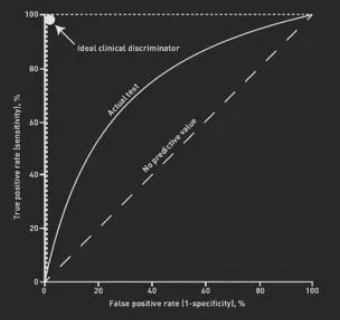

Tingueu en compte que la ROC no depèn de la distribució de classes. Això fa que sigui útil per avaluar classificadors que prediguin esdeveniments rars com malalties o desastres. En canvi, s'està avaluant el rendiment usant la precisió $\frac{TP + TN}{TP + TN + FN + FP}$ afavoriria els classificadors que sempre prediuen un resultat negatiu per a esdeveniments rars.

La Precision-Recall curve mostra la compensació entre la precisió i la recall (Sensibilitat) per a un llindar diferent. Una àrea alta sota la corba representa una sensibilitat alta i una alta precisió, on una alta precisió es relaciona amb una baixa taxa falsa positiva, i una alta sensibilitat es refereix a una baixa taxa falsa negativa. Les puntuacions més altes per a tots dos mostren que el classificador està retornant resultats precisos (alta precisió), així com tornant una majoria de tots els resultats positius (recall alta). Revisant la precisió i la sensibilitat, ambdues són útils en els casos on hi ha un desequilibri en les observacions entre les dues classes. Un model amb una habilitat perfecta es representa com un punt a (1,1). Un model hàbil està representat per una corba que s'inclina cap a (1,1) per sobre de la línia plana de cap habilitat.

A continuació mostrem la Precision-Recall i ROC curve:

Correct classification Logistic  0.5 % of the data:  0.7842696629213484
Correct classification SVM       0.5 % of the data:  0.6224719101123596
Correct classification Logistic  0.7 % of the data:  0.797752808988764
Correct classification SVM       0.7 % of the data:  0.6441947565543071
Correct classification Logistic  0.8 % of the data:  0.7921348314606742
Correct classification SVM       0.8 % of the data:  0.6179775280898876


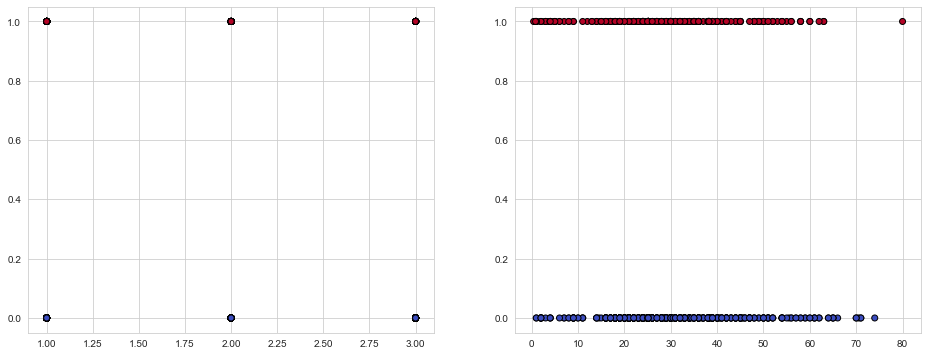

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split


# Take the first two features. We could avoid this by using a two-dim dataset
X = dataset_train.values[:, 1:]
y = dataset_train.values[:,:1] # Variable Survived
#y = dataset_train['Survived']
n_classes = 2
    
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,4], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,5], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')


particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el regresor logístic
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))


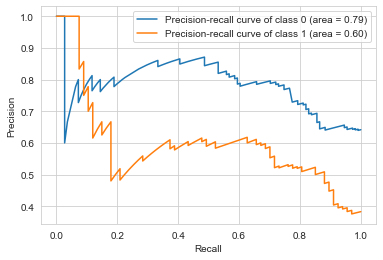

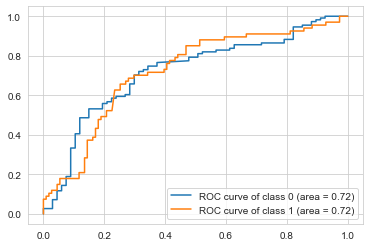

In [82]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

Les corbes Precision-Recall mostren una precisió alta per a la classe 0 (no sobreviu) peró una precisió una mica més baixa per a la classe 1, el que indica que el model és més precís per a la classe 0 que per la classe 1. Pel que fa a la sensibilitat, al començament el model és més sensible per a la classe 1 pero acaba assolint una sensibilitat semblant i alta per a ambdues classes.

Les corbes ROC s'aproximen a la cantonada superior esquerra, la qual cosa indica que el model té un bon rendiment i que és molt precís, tant per a la classe 0 (no sobreviu) com per la classe 1 (sobreviu) que són molt semblants. 


Com que ambdues corbes tenen coses a favor i en contra per a avaluar els nostres models, considerem que és millor emprar les dues corbes per a poder fer un millor anàlisis del rendiment dels models. En conclusió, utilitzarem la **ROC curve** i la **Precision-Recall curve**.

El **classification_report** construeix un informe de text que mostra les mètriques de classificació principals. Tal i com hem argumentat al principi d'aquest apartat, ens fixarem en la mètrica f1_score per tal d'optimitzar la classificació dels mostres models.

In [83]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

clf = svm.SVC(kernel='linear', C=1, random_state=42)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=2)
y_pred = cross_val_predict(clf, X, y, cv=5)

target_names = ['Sobreviu', 'No sobreviu']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Sobreviu       0.81      0.85      0.83       549
 No sobreviu       0.74      0.68      0.71       340

    accuracy                           0.79       889
   macro avg       0.78      0.77      0.77       889
weighted avg       0.79      0.79      0.79       889



In [84]:
clf = Perceptron(tol=1e-3, random_state=0)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=2)
y_pred = cross_val_predict(clf, X, y, cv=5)

target_names = ['Sobreviu', 'No sobreviu']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Sobreviu       0.79      0.57      0.66       549
 No sobreviu       0.52      0.76      0.62       340

    accuracy                           0.64       889
   macro avg       0.66      0.66      0.64       889
weighted avg       0.69      0.64      0.64       889



In [85]:
clf = LogisticRegression(random_state=16)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=2)
y_pred = cross_val_predict(clf, X, y, cv=5)

target_names = ['Sobreviu', 'No sobreviu']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Sobreviu       0.82      0.86      0.84       549
 No sobreviu       0.76      0.69      0.72       340

    accuracy                           0.80       889
   macro avg       0.79      0.77      0.78       889
weighted avg       0.79      0.80      0.79       889



In [86]:
clf = RandomForestClassifier(random_state=15)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=2)
y_pred = cross_val_predict(clf, X, y, cv=5)

target_names = ['Sobreviu', 'No sobreviu']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Sobreviu       0.84      0.85      0.84       549
 No sobreviu       0.75      0.73      0.74       340

    accuracy                           0.80       889
   macro avg       0.79      0.79      0.79       889
weighted avg       0.80      0.80      0.80       889



La següent gràfica ens permet comparar l'accuracy de cadascun dels models escollits amb l'estratègia de CV StratifiedKFold per a diferents valors de k {10, 5, 3} :

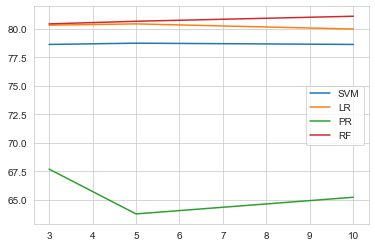

In [215]:
list_x = [10, 5, 3]

list_y_SVM = [78.63, 78.74, 78.63]
list_y_LR = [79.98, 80.43, 80.32]
list_y_PR = [65.24, 63.78, 67.71]
list_y_RF = [81.10, 80.66, 80.43]

list_name = ['SVM', 'LR', 'PR', 'RF']

list_total = [list_y_SVM, list_y_LR, list_y_PR, list_y_RF]

plt.figure()
for i, j in zip(list_total, list_name):
    plt.plot(list_x, i, label=j)
plt.legend()

### 6. Hyperparameter Search

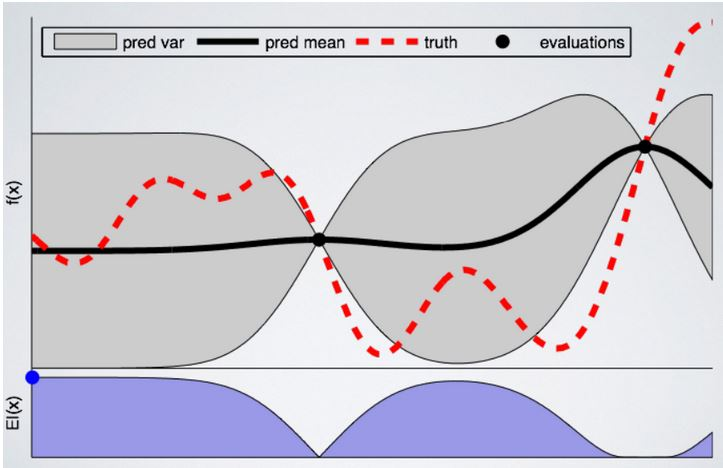Els hiperparàmetres són aquelles variables que comencem amb un valor afegit manualment abans de fer qualsevol entrenament. Buscar els millors hiperparàmetres és molt costós, ja que es tracta d'un procés iteratiu de complexitat lineal. Tot i així, hi ha diferents estratègies per agilitzar aquesta búsqueda.

#### Babysitting or Trial&Error

Aquest mecanisme és totalment manual i el més comú. Consisteix en anar iterant tots els hiperparàmetres que tenim fins que trobem quin és el millor.

#### Grid Search

Aquest mètode prova totes les combinacions possibles i troba quina és la millor. L'algorisme consisteix en el següent:
* Es defineix una taula d'*n* dimensions, on cada fila conté un hiperparàmetre diferent
* Per cada dimensió es defineix el rang de diferents possibilitats combinatories
* Buscar per cadascuna de les combinacions i trobar quina és la millor.

Aquesta estratègia és molt costosa perquè no té en compte el cost computacional. És per això que normalment es paral·lelitza i com més recursos tingui el teu ordinador, més combinacions pots provar. 

La complexitat d'aquest algorisme augmenta en funció del nombre de dimensions que conté la taula. És comú provar aquesta estratègia quan tens una taula de dimensió 4, però, tot i que garanteixi trobar la millor combinació, no és preferible fer-la servir.

#### Random Search

L'única diferencia entre el *Grid Search* i el *Random Search* és el en primer pas de l'estratègia, ja que aquesta segona tria aleatòriament el punt següent  de la configuració. És per això que segurament aquesta seria l'estratègia més preferible donat el cas de recursos limitats. Tot i que no garanteix que trobi una solució, és molt més eficient que la resta d'algorismes.

#### One step back, two steps forward

Aquest mètode està basant en l'algorisme *BackTracking*. Consisteix en anar agafant un altre hiperparàmetre si i només si aquest millora. 

### Altres optimitzacions
Com que totes les estratègies són molt costoses, existeixen diferents optimitzacions que acceleren el procès de tria. Una d'elles és *Bayesian Optimization*

#### Bayesian Optimization

Aquesta estratègia construeix un model substitud que intenta predir les configuracions que ens interessen a partir de la configuració dels hiperparàmetres. A cada iteració, busca un substitud que cada vegada aportarà més millores a la configuració. Per entendre millor aquest model, mirem la imatge següent:

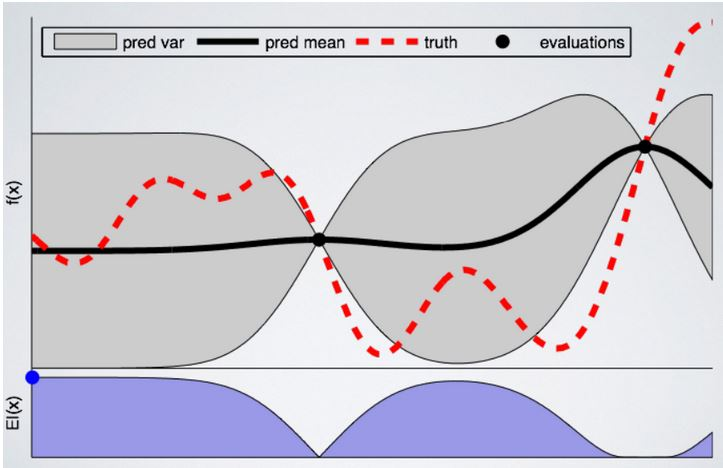

En la imatge que tenim a sobre es mostren les primeres passes del procès gaussià que es fa servir per a la optimització corresponent. En l'eix horitzontal tenim les variables que volem optimitzar i en l'eix vertical les característiques d'interés com a funcio de la variable que volem optimitzar.

Els punts negres representen el model entrenat fins el moment. La linia vermella és la funció que estem intentant predir, mentre que la linia negra representa la mitjana the l'hipòtesis actual que tenim per la funció vermella. Finalment, l'àrea grisa representa la incertesa o la variança en l'espai.

Tal com podem veure la incertesa disminueix al voltant dels punts. Això és degut a que estem força segurs dels resultats, doncs ja hem entrenat el nostre model allà.

Ara que ja hem triat el punt inicial, el model està preparat per triar el següent punt on entrenar el model. Per fer això, necessitem fer una funció de decisió. En les següents iteracions el resultat pot ser el següent:

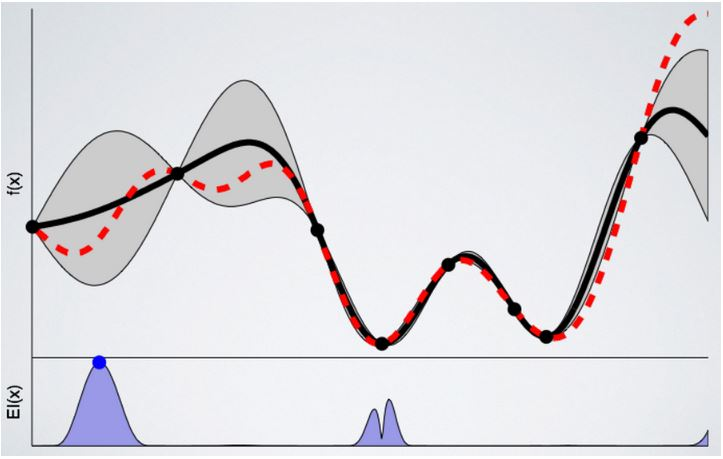

I així fins que el model estigui ben predit. 

Com que el *BabySitting* és un mètode que s'ha de fer manualment, no el durem a terme. Els que mirarem seràn el *GridSearch* i el *RandomSearch*. Els mètodes de selecció que hem fet servir són el *SVM*, *LogisticRegression*, *Perceptró* i *RandomForest*

#### SVM

Per a fer els testos següents, ens hem basat d'aquesta [pagina web](https://gist.github.com/statcompute/d97c42361a0a84e4ade02ed3fe667ca5)

In [111]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC as svc 
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats
import time
 
mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)
 
grid_list = {"C": np.arange(2, 10, 2),
             "gamma": np.arange(0.1, 1, 0.2)}

time_start = time.time()
grid_search = GridSearchCV(mdl, param_grid = grid_list, n_jobs = 4, cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0), scoring = 'f1') 
t1 = time.time() - time_start

grid_search.fit(X_train, y_train)
grid_results = grid_search.cv_results_
 

rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}          
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0), random_state = 2017, scoring = 'f1') 
t2 = time.time() - t1
rand_search.fit(X_train, y_train)
rand_results = rand_search.cv_results_

In [112]:
print("---- GRID SEARCH ------")
print("Best score:", grid_search.best_score_)
print("Best param:", grid_search.best_params_)
print("Best index:", grid_search.best_index_)
print("Error score:", grid_search.error_score)
print("Time:", t1)

print("---- RANDOM SEARCH ------")
print("Best score:", rand_search.best_score_)
print("Best param:", rand_search.best_params_)
print("Best index:", rand_search.best_index_)
print("Error score:", rand_search.error_score)
print("Time:", t3)

---- GRID SEARCH ------
Best score: 0.545984178063824
Best param: {'C': 8, 'gamma': 0.1}
Best index: 15
Error score: nan
Time: 0.0
---- RANDOM SEARCH ------
Best score: 0.5412928824615714
Best param: {'C': 6.733970816481659, 'gamma': 0.10614926514043757}
Best index: 13
Error score: nan
Time: 0.0


#### Logistic Regression

Hem tret d'aquestes pàgines web els testos de [Grid Search](https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python) i [Random Search](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/)

In [113]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] =   ['l1', 'l2', 'elasticnet', 'none']

#start_time = time.time()
time_start = time.time()
clf =  GridSearchCV(model, space,  n_jobs=-1, cv=cv)
t1 = time.time() - time_start

best_model = clf.fit(X_train,y_train)

y_pred_gs = clf.predict(X_test)

print(clf.best_estimator_)

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] =   ['l1', 'l2', 'elasticnet', 'none']

#start_time = time.time()

search = RandomizedSearchCV(model, space, n_iter=500, n_jobs=-1, cv=cv, random_state=1)
t2 = time.time() - t1

result = search.fit(X_train,y_train)
y_pred_rs = search.predict(X_test)

print(search.best_estimator_)

LogisticRegression(penalty='none', solver='newton-cg')
LogisticRegression(penalty='none', solver='newton-cg')


In [114]:
print("---- GRID SEARCH ------")
print("Best score:", clf.best_score_)
print("Best param:", clf.best_params_)
print("Best index:", clf.best_index_)
print("Error score:", clf.error_score)
print("Time:", t1)

print("---- RANDOM SEARCH ------")
print("Best score:", search.best_score_)
print("Best param:", search.best_params_)
print("Best index:", search.best_index_)
print("Error score:", search.error_score)
print("Time:", t2)

---- GRID SEARCH ------
Best score: 0.825
Best param: {'penalty': 'none', 'solver': 'newton-cg'}
Best index: 9
Error score: nan
Time: 0.0
---- RANDOM SEARCH ------
Best score: 0.825
Best param: {'solver': 'newton-cg', 'penalty': 'none'}
Best index: 9
Error score: nan
Time: 1667512958.8854842


#### Perceptró
Hem tret els testos d'aquesta [pagina web](https://github.com/manurFR/machine-learning-fun/blob/master/pima/03_perceptron.py)

In [218]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import linear_model, metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
import numpy as np
import pylab as pl

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

param_grid={'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3], 'max_iter': [5,10]}

perceptron = linear_model.Perceptron(random_state=0)
gridsearch = GridSearchCV(perceptron, param_grid,
                cv=cv, scoring='f1')

gridsearch.fit(X_train, y_train)

print("Best params: {}".format(gridsearch.best_params_))
print ("Best f1 score: %.5f" % gridsearch.best_score_)

perceptron = linear_model.Perceptron(max_iter=15, random_state=0)
scores = cross_val_score(perceptron, X_train, y_train, scoring='f1', cv=cv)
print("Cross-validation (mean) f1-score: %.5f\n" % np.mean(scores))

perceptron.fit(X_train, y_train)
predicted = perceptron.predict(X_test)

print("Test accuracy score (with trained model): %.5f" % perceptron.score(X_test, y_test))
print(metrics.classification_report(y_test, predicted, target_names=['Survived', 'Not Survived']))


search = RandomizedSearchCV(perceptron, param_grid, n_iter=500, n_jobs=-1, cv=cv, random_state=1)
result = search.fit(X_train,y_train)
y_pred_rs = search.predict(X_test)

print(search.best_estimator_)
print("Best params: {}".format(search.best_params_))
print ("Best f1 score: %.5f" % search.best_score_)

print("---- GRID SEARCH ------")
print("Best score:", gridsearch.best_score_)
print("Best param:", gridsearch.best_params_)
print("Best index:", gridsearch.best_index_)
print("Error score:", gridsearch.error_score)

print("---- RANDOM SEARCH ------")
print("Best score:", search.best_score_)
print("Best param:", search.best_params_)
print("Best index:", search.best_index_)
print("Error score:", search.error_score)

Best params: {'alpha': 0.0001, 'max_iter': 5}
Best f1 score: 0.52922
Cross-validation (mean) f1-score: 0.55749

Test accuracy score (with trained model): 0.71348
              precision    recall  f1-score   support

    Survived       0.86      0.63      0.73       216
Not Survived       0.60      0.84      0.70       140

    accuracy                           0.71       356
   macro avg       0.73      0.74      0.71       356
weighted avg       0.76      0.71      0.72       356

Perceptron(max_iter=10)
Best params: {'max_iter': 10, 'alpha': 0.0001}
Best f1 score: 0.66375
---- GRID SEARCH ------
Best score: 0.5292166049996101
Best param: {'alpha': 0.0001, 'max_iter': 5}
Best index: 0
Error score: nan
---- RANDOM SEARCH ------
Best score: 0.6637500000000001
Best param: {'max_iter': 10, 'alpha': 0.0001}
Best index: 1
Error score: nan


In [116]:
print("---- GRID SEARCH ------")
print("Best score:", gridsearch.best_score_)
print("Best param:", gridsearch.best_params_)
print("Best index:", gridsearch.best_index_)
print("Error score:", gridsearch.error_score)
print("Time:",t1)

---- GRID SEARCH ------
Best score: 0.5292166049996101
Best param: {'alpha': 0.0001, 'max_iter': 5}
Best index: 0
Error score: nan
Time: 0.0


#### Random Forest
Hem tret els testos d'aquesta [pagina web](https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv)

In [117]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rfc=RandomForestClassifier(random_state=15)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

#start_time = time.time()
time_start = time.time()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=cv)
t1 = time.time() - time_start

rnd_result = CV_rfc.fit(X_train, y_train)

In [118]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state = 35)

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap}

time_start = time.time()
rf_random = RandomizedSearchCV(estimator = rf,
            param_distributions = random_grid,
            n_iter = 100, cv = cv, verbose=2, random_state=35, n_jobs = -1)
t2 = time.time() - time_start

rnd_result = rf_random.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [119]:
print("---- GRID SEARCH ------")
print("Best score:", CV_rfc.best_score_)
print("Best param:", CV_rfc.best_params_)
print("Best index:", CV_rfc.best_index_)
print("Error score:", CV_rfc.error_score)
print("Time,", t1)

print("---- RANDOM SEARCH ------")
print("Best score:", rf_random.best_score_)
print("Best param:", rf_random.best_params_)
print("Best index:", rf_random.best_index_)
print("Error score:", rf_random.error_score)
print("Time:", t2)

---- GRID SEARCH ------
Best score: 0.83125
Best param: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
Best index: 1
Error score: nan
Time, 0.0010006427764892578
---- RANDOM SEARCH ------
Best score: 0.456252535952698
Best param: {'n_estimators': 19, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}
Best index: 90
Error score: nan
Time: 0.0


# Apartat (A): Comparativa de models
L'objectiu d'aquest apartat és aprendre a comparar el rendiment obtingut amb els diferents models, utilitzant les mètriques adequades: precision-recall, accuracy, corba ROC, F1 score, etc... 

Es tracta d'ordenar per rendiment i descriure el per què dels resultats obtinguts amb els mètodes utilitzats en el següent apartat B.

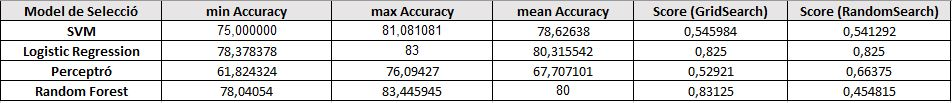


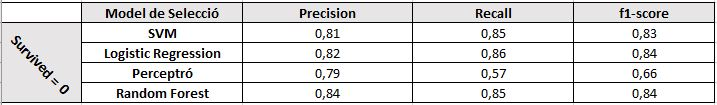


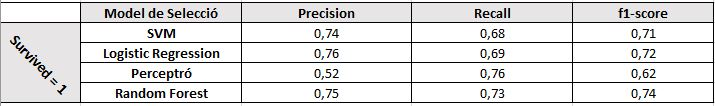

En aquestes taules recollim tots els diferents valors que hem obtingut dels diferents mètodes que hem aplicat. Després d'estudiar amb detall els valors, podem afirmar que el millor mètode de selecció és el **Random Forest**, el qual és un ensamble method. És el que presenta les accuracies i les precisions més altes, una de les sensibilitats més elevades, i de tots és qui té la matriu de confusió més precisa.